<div style="border:solid black 2px; padding: 20px">

# Reviewer's feedback v.1

**Halo Fawwaz**
    
**Greetings from Chamdani**

Terima kasih telah mengirimkan project kamu dengan ini kamu sudah memulai sebuah langkah yang luar biasa saat ini. Disini saya akan mereview proyek kamu ya.

Saya akan memberikan beberapa komentar dan feedback seperti dibawah ini, **mohon jangan dipindah, dirubah, maupun dihapus ya :).**
    
> Mohon diperhatikan bahwa apabila ada temuan atau kesalahan yang sama namun tidak ada komentar perbaikan disana, itu berarti kamu masih tetap harus memperbaikinya yaa.

Komentar yang saya berikan akan muncul dalam warna hijau, kuning, atau pun merah seperti ini:

</div>

<div class="alert alert-success">
<b>Chamdani's comment v.*</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

<div class="alert alert-warning">
<b>Chamdani's comment v.*</b> <a class="tocSkip"></a>

Ada beberapa catatan.

</div>

<div class="alert alert-danger">
<b>Chamdani's comment v.*</b> <a class="tocSkip"></a>

Perlu beberapa perbaikan.

</div>

<div class="alert alert-info">
<b>Chamdani's info v.1</b> <a class="tocSkip"></a>

Catatan umum:
* Fungsi `print` tidak diperlukan untuk mencetak suatu nilai
* Lebih baik tulis kode pada bagian akhir cell code untuk menampilkan output tanpa `print`
* Perintah soal yang ada dalam tanda kurung siku `[...]` sebaiknya dihilangkan
* Sangat disarankan untuk menggunakan cell markdown untuk memberikan deskripsi temuan atau kesimpulan.
* Tidak disarankan menggunakan cell code untuk memberikan penjelasan / deskripsi.
* Untuk menghindari galat pada notebook project kamu. Batasi jumlah output yang dikeluarkan setiap kode dengan batas max 10 baris data.

</div>

<div style="border:solid gray 5px; padding: 20px" class="alert alert-warning">

**INGATLAH** 
* Project kamu tidak akan bisa diterima bila kamu masih memiliki feedback berwarna merah. 
* Kamu hanya memiliki 3 kali kesempatan iterasi submission disetiap projectnya 
* Kamu dapat memperbaiki dan menyelesaikan feedback **pertama** dari saya tidak lebih dari 1\*24 jam. *Untuk membantu saya mengetahui apakah ada kesulitan dari feedback project kamu*
* Jika merasa kesulitan kamu dapat menuliskan responmu atas feedback saya menggunakan blok markdown warna biru yaa.

Kamu dapat menjawab saya dengan menggunakan blok berwarna biru seperti ini

<div class="alert alert-info">
<b>Student answer</b> <a class="tocSkip"></a>

Siap kak.

</div>

<div style="border:solid black 2px; padding: 20px" class="alert alert-success">
    
# General feedback v.1 *Project Accepted*

Terima kasih banyak telah mengirimkan proyek Anda! 
<br>
    
Secara keseluruhan, proyek Anda **SANGAT** mengesankan. Semoga apa yang kamu pelajari dalam project ini dapat membantu meningkatkan kemampuanmu. Pertahankan apa yang sudah bagus, dan tingkatkan apa yang menurutmu masih perlu ditingkatkan. Semoga berhasil pada project selanjutnya yaa :)

**TETAP SEMANGAT!!**
    
</div>

# Keterangan Tugas

Film Junky Union, sebuah komunitas baru bagi penggemar film klasik sedang mengembangkan sistem untuk memfilter dan mengategorikan ulasan film. Misi utamanya adalah melatih model agar bisa mendeteksi ulasan negatif secara otomatis. Anda akan menggunakan *dataset* ulasan film IMBD dengan pelabelan polaritas untuk membuat sebuah model yang bisa mengklasifikasikan ulasan positif dan negatif. Model ini setidaknya harus memiliki skor F1 sebesar 0,85.

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

## Inisialisasi

In [1]:
import math

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import re
from tqdm.auto import tqdm
from sklearn.model_selection import cross_val_score

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# baris berikutnya menyediakan grafik dengan kualitas yang lebih baik di layar HiDPI 

# %config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn')

In [3]:
# ini untuk menggunakan progress_apply, baca lebih lanjut di https://pypi.org/project/tqdm/
# pandas-integration
tqdm.pandas()

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

## Memuat data

In [4]:
df_reviews = pd.read_csv('/datasets/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})

In [5]:
df_reviews.head()

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
0,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,The pakage implies that Warren Beatty and Gold...,1,neg,0,train,8335
1,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,How the hell did they get this made?! Presenti...,1,neg,0,train,8336
2,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,There is no real story the film seems more lik...,3,neg,0,test,2489
3,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,Um .... a serious film about troubled teens in...,7,pos,1,test,9280
4,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,I'm totally agree with GarryJohal from Singapo...,9,pos,1,test,9281


In [6]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47331 non-null  object 
 1   title_type       47331 non-null  object 
 2   primary_title    47331 non-null  object 
 3   original_title   47331 non-null  object 
 4   start_year       47331 non-null  int64  
 5   end_year         47331 non-null  object 
 6   runtime_minutes  47331 non-null  object 
 7   is_adult         47331 non-null  int64  
 8   genres           47331 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  Int64  
 11  review           47331 non-null  object 
 12  rating           47331 non-null  int64  
 13  sp               47331 non-null  object 
 14  pos              47331 non-null  int64  
 15  ds_part          47331 non-null  object 
 16  idx              47331 non-null  int64  
dtypes: Int64(1),

In [7]:
df_reviews.describe()

,start_year,is_adult,average_rating,votes,rating,pos,idx
count,47331.000000,47331.000000,47329.000000,4.732900e+04,47331.000000,47331.000000,47331.000000
mean,1989.631235,0.001732,5.998278,2.556292e+04,5.484608,0.498954,6279.697999
std,19.600364,0.041587,1.494289,8.367004e+04,3.473109,0.500004,3605.702545
min,1894.000000,0.000000,1.400000,9.000000e+00,1.000000,0.000000,0.000000
25%,1982.000000,0.000000,5.100000,8.270000e+02,2.000000,0.000000,3162.000000
50%,1998.000000,0.000000,6.300000,3.197000e+03,4.000000,0.000000,6299.000000
75%,2004.000000,0.000000,7.100000,1.397400e+04,9.000000,1.000000,9412.000000
max,2010.000000,1.000000,9.700000,1.739448e+06,10.000000,1.000000,12499.000000


In [8]:
df_reviews.ds_part.value_counts(normalize=True)

train    0.502757
test     0.497243
Name: ds_part, dtype: float64

In [9]:
df_reviews.isna().sum()

tconst             0
title_type         0
primary_title      0
original_title     0
start_year         0
end_year           0
runtime_minutes    0
is_adult           0
genres             0
average_rating     2
votes              2
review             0
rating             0
sp                 0
pos                0
ds_part            0
idx                0
dtype: int64

In [10]:
df_reviews['average_rating'] = df_reviews['average_rating'].fillna(df_reviews['average_rating'].median())
df_reviews['votes'] = df_reviews['votes'].fillna(df_reviews['votes'].median())

- Data df_reviews terdiri dari 47331 baris dan 17 kolom. 
- Kolom review memiliki jumlah baris yang sama.
- kolom average_rating dan votes memiliki nilai yang hilang.
- Kolom ds_part berisi keterangan train atau test.

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

## EDA

Mari kita periksa jumlah film dan ulasan selama beberapa tahun.

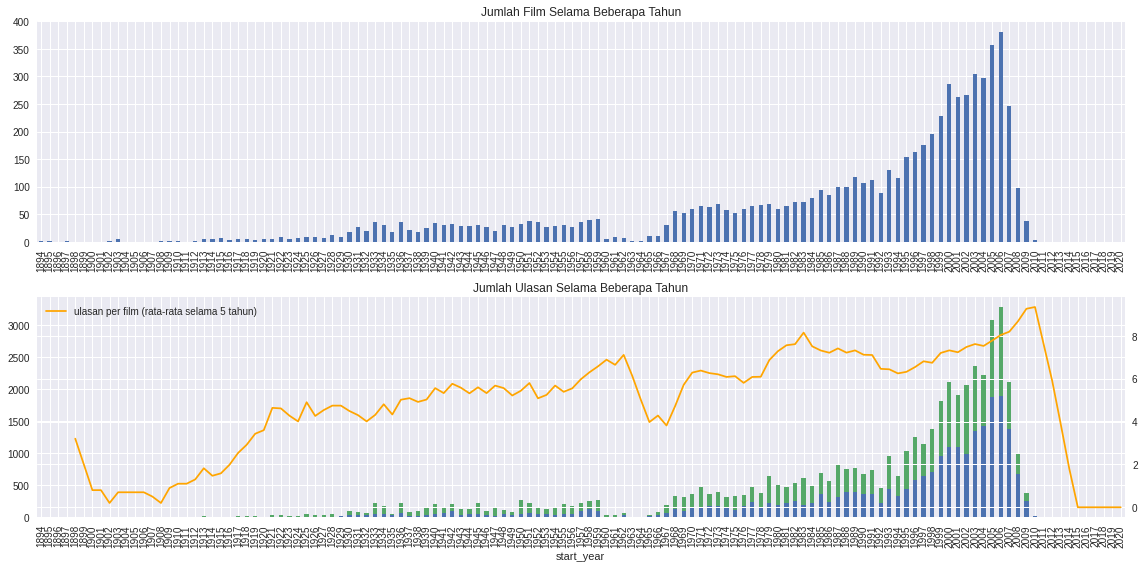

In [11]:
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

ax = axs[0]

dft1 = df_reviews[['tconst', 'start_year']].drop_duplicates() \
    ['start_year'].value_counts().sort_index()
dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2021))).fillna(0)
dft1.plot(kind='bar', ax=ax)
ax.set_title('Jumlah Film Selama Beberapa Tahun')

ax = axs[1]

dft2 = df_reviews.groupby(['start_year', 'pos'])['pos'].count().unstack()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)

dft2.plot(kind='bar', stacked=True, label='#ulasan  (neg, pos)', ax=ax)

dft2 = df_reviews['start_year'].value_counts().sort_index()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft3 = (dft2/dft1).fillna(0)
axt = ax.twinx()
dft3.reset_index(drop=True).rolling(5).mean().plot(color='orange', label='ulasan per film (rata-rata selama 5 tahun)', ax=axt)

lines, labels = axt.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

ax.set_title('Jumlah Ulasan Selama Beberapa Tahun') 

fig.tight_layout()

Dari grafik diatas dapat dilihat peningkatan jumlah film dengan puncaknya pada tahun 2007 dan mulai menurun hingga 2010. Untuk rata- rata ulasan per film setiap 5 tahun terlihat lebih konstan terutama antara tahun 1920 hingga 2010.

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

Periksa distribusi jumlah ulasan per film dengan penghitungan yang tepat dan KDE (hanya untuk mengetahui perbedaannya dari penghitungan yang tepat)

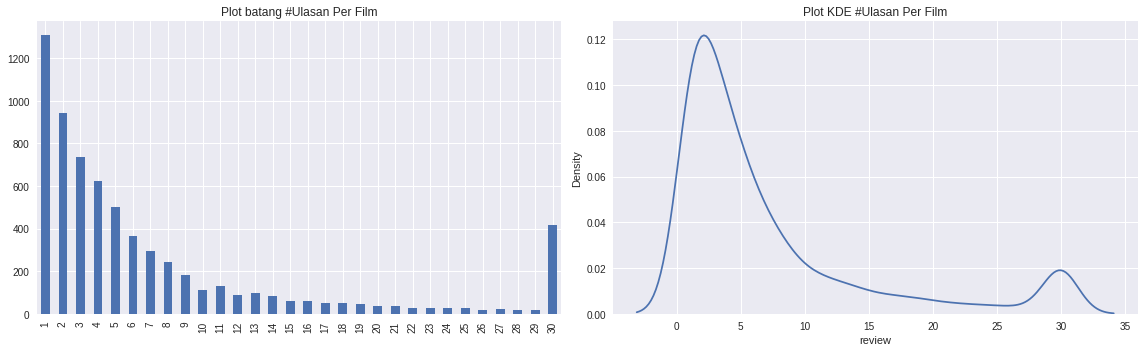

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

ax = axs[0]
dft = df_reviews.groupby('tconst')['review'].count() \
    .value_counts() \
    .sort_index()
dft.plot.bar(ax=ax)
ax.set_title('Plot batang #Ulasan Per Film')
ax = axs[1]
dft = df_reviews.groupby('tconst')['review'].count()
sns.kdeplot(dft, ax=ax)
ax.set_title('Plot KDE #Ulasan Per Film') 

fig.tight_layout()

Mayoritas film mendapatkan 1-3 ulasan.

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

In [13]:
df_reviews['pos'].value_counts(normalize=True)

0    0.501046
1    0.498954
Name: pos, dtype: float64

Pada kolom pos ulasan negatif(0) dan positif(1) memiliki jumlah yang hanya sedikit berbeda.

Selanjutnya kita cek kolom rating.

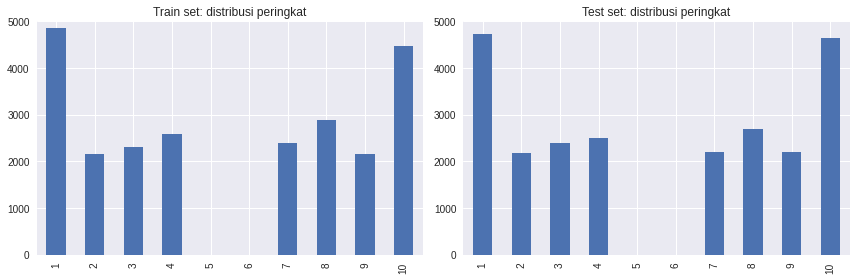

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ax = axs[0]
dft = df_reviews.query('ds_part == "train"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('Train set: distribusi peringkat')

ax = axs[1]
dft = df_reviews.query('ds_part == "test"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('Test set: distribusi peringkat')

fig.tight_layout()

distribusi rating pada kedua dataset terlihat mirip.

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

Distribusi ulasan negatif dan positif selama bertahun-tahun untuk dua bagian *dataset*

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)


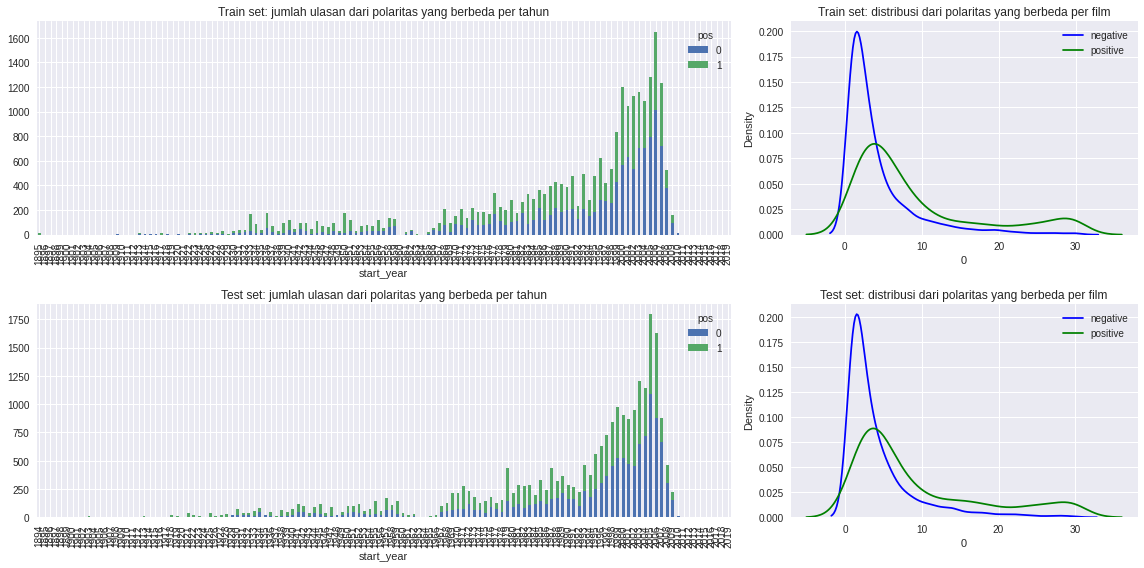

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8), gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))

ax = axs[0][0]

dft = df_reviews.query('ds_part == "train"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Train set: jumlah ulasan dari polaritas yang berbeda per tahun')

ax = axs[0][1]

dft = df_reviews.query('ds_part == "train"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('Train set: distribusi dari polaritas yang berbeda per film')

ax = axs[1][0]

dft = df_reviews.query('ds_part == "test"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Test set: jumlah ulasan dari polaritas yang berbeda per tahun')

ax = axs[1][1]

dft = df_reviews.query('ds_part == "test"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('Test set: distribusi dari polaritas yang berbeda per film')

fig.tight_layout()

Jika kita lihat distibusinya pada kedua dataset cukup mirip, dengan ulasan negatif cenderung lebih banyak.

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

## Prosedur Evaluasi

Menyusun evaluasi yang dapat digunakan untuk semua model dalam tugas ini secara rutin

In [16]:
import sklearn.metrics as metrics

def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # Scor F1 
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # menetapkan persilangan untuk beberapa ambang batas
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'Skor F1') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # menetapkan persilangan untuk beberapa ambang batas
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'Kurva ROC')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # menetapkan persilangan untuk beberapa ambang batas
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Akurasi'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Akurasi', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    return

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

## Normalisasi

Kita menganggap semua model di bawah menerima teks dalam huruf kecil dan tanpa angka, tanda baca, dll.

In [17]:
def clean_text(row):
    text = row['review']
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\']', ' ', text)
    text = text.split()
    text = " ".join(text)    
    return text

In [18]:
df_reviews['review_norm'] = df_reviews.apply(clean_text, axis=1)
df_reviews['review_norm'].head()

0    the pakage implies that warren beatty and gold...
1    how the hell did they get this made presenting...
2    there is no real story the film seems more lik...
3    um a serious film about troubled teens in sing...
4    i'm totally agree with garryjohal from singapo...
Name: review_norm, dtype: object

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

## Pemisahan Train / Test

Untungnya, seluruh *dataset* sudah dibagi menjadi *train/test*. Bendera yang sesuai adalah 'ds_part'.

In [19]:
df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

train_target  = df_reviews_train['pos']
test_target  = df_reviews_test['pos']

train_features  = df_reviews_train['review_norm']
test_features  = df_reviews_test['review_norm']

print(df_reviews_train.shape)
print(df_reviews_test.shape)

(23796, 18)
(23535, 18)


In [20]:
test_target.value_counts()

0    11803
1    11732
Name: pos, dtype: int64

In [21]:
train_features

0        the pakage implies that warren beatty and gold...
1        how the hell did they get this made presenting...
7        this true story of carlson's raiders is more o...
8        should have been titled 'balderdash ' little i...
9        the movie 'gung ho ' the story of carlson's ma...
                               ...                        
47253    o my gosh just give me a minute to breath this...
47254    i can't tell you all how much i love this movi...
47255    legend of zu is possibly the most exciting mov...
47256    this movie is well done on so many levels that...
47257    as a history nut who is particularly intereste...
Name: review_norm, Length: 23796, dtype: object

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

## Bekerja dengan Model

### Model 0 - Konstan

In [22]:
from sklearn.dummy import DummyClassifier

In [23]:
%%time
model_0 = DummyClassifier(strategy="stratified")
model_0.fit(train_features, train_target)
score = cross_val_score(model_0, train_features, train_target, cv=5).mean()
print('Score ',score)

Score  0.5012601951896539
CPU times: user 43.1 ms, sys: 255 µs, total: 43.4 ms
Wall time: 41.8 ms


         train  test
Akurasi    0.5   0.5
F1         0.5   0.5
APS        0.5   0.5
ROC AUC    0.5   0.5


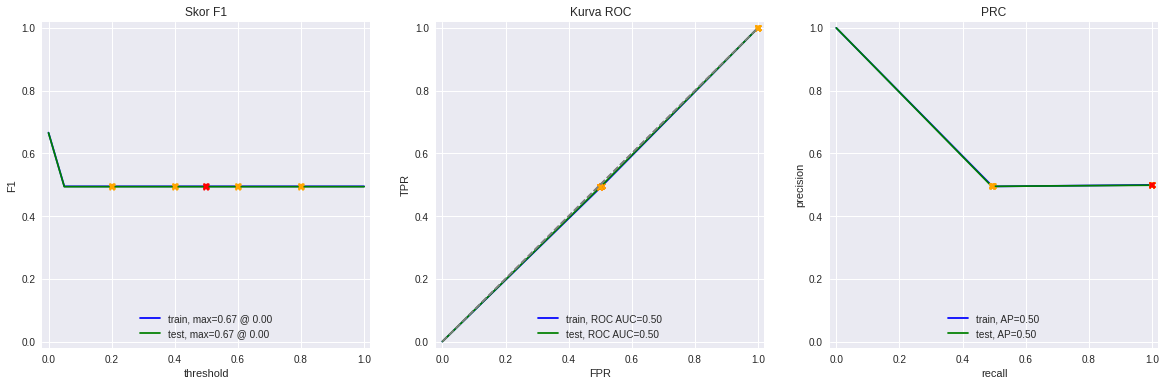

In [24]:
evaluate_model(model_0, train_features, train_target, test_features, test_target)

Jika model konstan menebak secara merata , tentu hasilnya akan 'fifty- fifty'.

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

### Model 1 - NLTK, TF-IDF dan LR

TF-IDF

In [25]:
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords as nltk_stopwords
lemmatizer  = WordNetLemmatizer()

In [26]:
def text_lemma(row):
    text = row['review_norm']
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return ' '.join(tokens)

df_reviews_train['review_lemma'] = df_reviews_train.apply(text_lemma, axis=1)
df_reviews_test['review_lemma'] = df_reviews_test.apply(text_lemma, axis=1)

In [27]:
stop_words = set(nltk_stopwords.words('english'))
count_tf_idf_nltk = TfidfVectorizer(stop_words=stop_words)
corpus_train = df_reviews_train['review_lemma']
corpus_test = df_reviews_test['review_lemma']

train_features_1 = count_tf_idf_nltk.fit_transform(corpus_train)
test_features_1 = count_tf_idf_nltk.transform(corpus_test)

In [28]:
%%time
model_1 = LogisticRegression()
model_1.fit(train_features_1,train_target)
score = cross_val_score(model_1, train_features_1, train_target, cv=5).mean()
print('Score ', score)

Score  0.8692631475788467
CPU times: user 10.8 s, sys: 19.4 s, total: 30.2 s
Wall time: 30.3 s


         train  test
Akurasi   0.94  0.88
F1        0.94  0.88
APS       0.98  0.95
ROC AUC   0.98  0.95


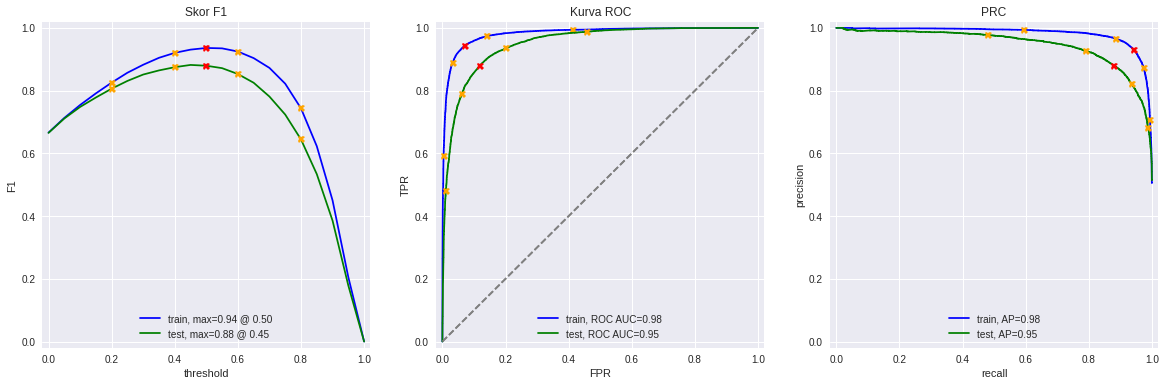

In [29]:
evaluate_model(model_1, train_features_1, train_target, test_features_1, test_target)

Pada model ini menggunakan tf idf dan logistic regression. Akurasi yang didapatkan sebesar 0.88.

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

### Model 2 - spaCy, TF-IDF dan LR

In [30]:
import spacy

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [31]:
def text_preprocessing_3(row):
    
    text = row['review_norm']
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc]
    
    return ' '.join(tokens)

In [ ]:
df_reviews_train['review_lemma_2'] = df_reviews_train.apply(text_preprocessing_3, axis=1)
df_reviews_test['review_lemma_2'] = df_reviews_test.apply(text_preprocessing_3, axis=1)

In [ ]:
count_tf_idf_spacy = TfidfVectorizer()
corpus_train = df_reviews_train['review_lemma_2']
corpus_test = df_reviews_test['review_lemma_2']

Train_features_2 = count_tf_idf_spacy.fit_transform(corpus_train)
test_features_2 = count_tf_idf_spacy.transform(corpus_test)

In [ ]:
%%time
model_2 = LogisticRegression()
model_2.fit(Train_features_2,train_target)
score = cross_val_score(model_2, Train_features_2, train_target, cv=5).mean()
print('Score ', score)

In [ ]:
evaluate_model(model_2, Train_features_2, train_target, test_features_2, test_target)

Pada model ini selain tf-idf kita juga menggunakan spacy, dan hasil akurasi dari algoritma logistic regression sebesar 0.88. 

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

### Model 3 - spaCy, TF-IDF dan LGBMClassifier

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
train_features_3 = count_tf_idf_spacy.fit_transform(corpus_train)
test_features_3 = count_tf_idf_spacy.transform(corpus_test)

In [ ]:
%%time
model_3 = LGBMClassifier()
model_3.fit(train_features_3,train_target)
score = cross_val_score(model_3, train_features_3, train_target, cv=5).mean()
print('Score ', score)

In [ ]:
evaluate_model(model_3, train_features_3, train_target, test_features_3, test_target)

Pada model model ketiga kita menggunakan vektorisasi yang sama dengan model 2, dengan algoritma LGBM. Hasil akurasi yang didapatkan adalah 0.86.

Berikutnya kita akan mencoba model- model tersebut terhadap data baru yang kita miliki.

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

## Ulasan Saya

In [ ]:
# jangan ragu untuk menghapus ulasan ini dan mencoba model Anda sendiri terhadap ulasan Anda, ini hanyalah sekadar contoh 

my_reviews = pd.DataFrame([
    'I did not simply like it, not my kind of movie.',
    'Well, I was bored and felt asleep in the middle of the movie.',
    'I was really fascinated with the movie',    
    'Even the actors looked really old and disinterested, and they got paid to be in the movie. What a soulless cash grab.',
    'I didn\'t expect the reboot to be so good! Writers really cared about the source material',
    'The movie had its upsides and downsides, but I feel like overall it\'s a decent flick. I could see myself going to see it again.',
    'What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even kids won\'t like this!',
    'Launching on Netflix was a brave move & I really appreciate being able to binge on episode after episode, of this exciting intelligent new drama.'
], columns=['review'])

my_reviews['review_norm'] = my_reviews.apply(clean_text, axis=1)

my_reviews

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

Kita akan menguji model yang telah digunakan terhadap data review diatas. Data terdiri dari 8 baris dengan 0, 1, 3, 5, 6 = negatif dan 2, 4, 7 = positif.

### Model 1

In [ ]:
my_reviews['review_lemma'] = my_reviews.apply(text_lemma, axis=1)
texts = my_reviews['review_lemma']
my_reviews_pred_prob = model_1.predict_proba(count_tf_idf_nltk.transform(texts))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

Berdasarkan review dari model 1,baris 0, 1, 2, 3, 4, 6 = negatif dan 5, 7 = positif.

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

### Model 2

In [ ]:
def text_preprocessing_3(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc]
    return ' '.join(tokens)

In [ ]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = model_2.predict_proba(count_tf_idf_spacy.transform(texts.apply(lambda x: text_preprocessing_3(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

Berdasarkan review dari mode2 1,baris 0, 1, 2, 3, 4, 6 = negatif dan 5, 7 = positif.

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

### Model 3

In [ ]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = model_3.predict_proba(count_tf_idf_spacy.transform(texts.apply(lambda x: text_preprocessing_3(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

Berdasarkan review dari model 3,baris 1, 3, 4, 6 = negatif dan 0, 2, 3, 5, 7 = positif.

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

## Kesimpulan

Pada proyek ini kita memiliki data imdb reviews sejumlah 47331 baris dan 17 kolom. Dari grafik diatas dapat dilihat peningkatan jumlah film dengan puncaknya pada tahun 2007 dan mulai menurun hingga 2010. Untuk rata- rata ulasan per film setiap 5 tahun terlihat lebih konstan terutama antara tahun 1920 hingga 2010.

Model yang digunakan adalah logistic regression dan LGBM, dengan menggunakan vektorisasi nltk dan spacy.

Dari ketiga model model logistic regression memiliki akurasi terbesar dan vektorisasi tanpa spacy membuat model lebih cepat. Dari hasil pengecekan terhadap data review baru, didapatkan model 3 tidak terlalu akurat. Sedangkan model 1 dan 2 memiliki hasil yang mirip.

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

# Daftar Periksa

- [x]  *Notebook* dibuka 
- [ ]  Data teks telah dimuat dan dilakukan pra-pemrosesan untuk vektorisasi 
- [ ]  Data teks telah diubah menjadi vektor 
- [ ]  Model telah terlatih dan diuji 
- [ ]  Ambang batas metrik tercapai 
- [ ]  Semua kode sel tersusun sesuai urutan eksekusinya 
- [ ]  Semua kode sel bisa dieksekusi tanpa *error* 
- [ ]  Terdapat kesimpulan 